In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_csv = pd.read_csv("/content/sample_data/mnist_train_small.csv",header=None)
data = data_csv.sample(n=1000)
X = data.drop(columns=0)
Y = data.iloc[:,0]

In [3]:
S = np.sum(X,axis=0).squeeze()

sin_cambio = S==0
con_cambio = np.array(S!=0).squeeze()

In [4]:
X_procesado = X.iloc[:,con_cambio]

In [5]:
print(X.shape)
print(X_procesado.shape)

(1000, 784)
(1000, 620)


In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters=10,random_state=123).fit(X_procesado)

In [8]:
print(km.cluster_centers_)


[[ 1.38777878e-17 -5.55111512e-17  5.55111512e-17 ...  0.00000000e+00
  -1.66533454e-16 -6.93889390e-18]
 [ 1.38777878e-17 -5.55111512e-17  5.55111512e-17 ...  0.00000000e+00
  -1.66533454e-16 -6.93889390e-18]
 [ 4.16333634e-17 -5.55111512e-17 -2.77555756e-17 ...  6.66133815e-16
  -1.66533454e-16 -6.93889390e-18]
 ...
 [ 3.60294118e-01  1.86029412e+00  4.41176471e-01 ...  3.81617647e+00
   1.88235294e+00  1.32352941e-01]
 [ 2.08166817e-17 -5.55111512e-17  8.32667268e-17 ...  2.22044605e-16
  -1.66533454e-16 -6.93889390e-18]
 [ 4.16333634e-17 -5.55111512e-17 -2.77555756e-17 ...  6.66133815e-16
  -1.66533454e-16 -1.04083409e-17]]


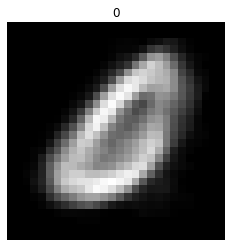

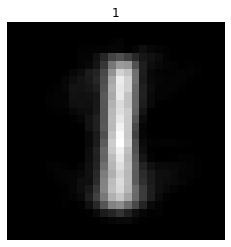

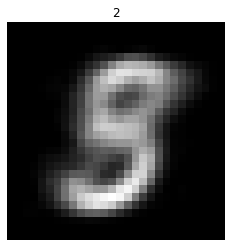

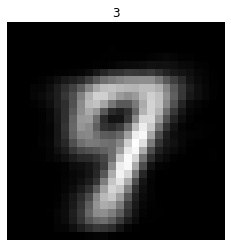

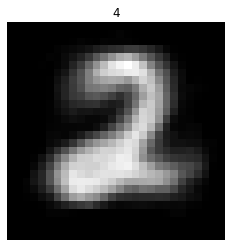

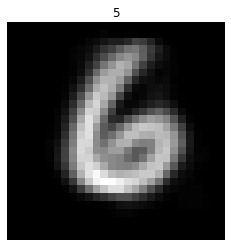

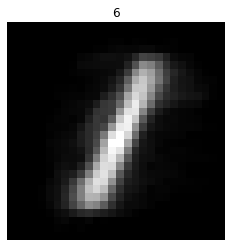

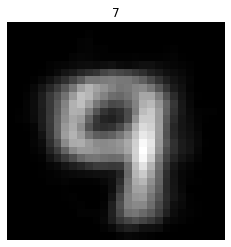

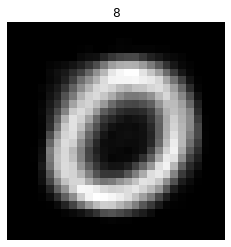

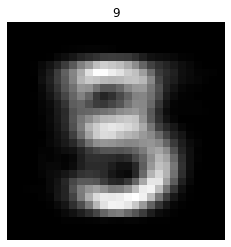

In [9]:
for cluster, vector_prototipo in enumerate(km.cluster_centers_):
  imagen = np.zeros(784)
  imagen[con_cambio] = np.squeeze(vector_prototipo)
  plt.figure()
  plt.imshow(np.reshape(imagen,(28,28)),cmap='gray')
  plt.axis("off")
  plt.title(cluster)


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [11]:
cm = confusion_matrix(Y,km.labels_,normalize='true')

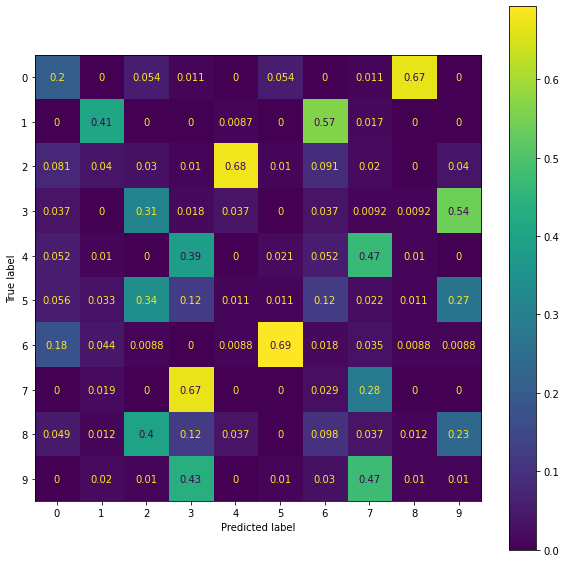

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(ax=ax)

In [13]:
distancia_numero = []
for i in range(1,20):
  km_test = KMeans(n_clusters=i,random_state=123).fit(X_procesado)
  distancia_numero.append(km_test.inertia_)




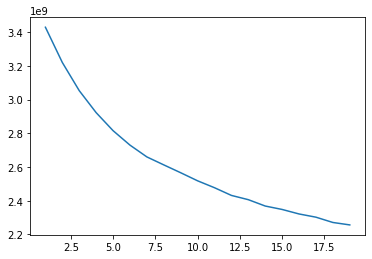

In [14]:
plt.plot(range(1,20),distancia_numero)
#plt.yscale('log')

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print(X.shape)


(150, 4)


In [ ]:
distancia = []
cluster_centers = []
for i in range(1,20):
  km_test = KMeans(n_clusters=i,random_state=123).fit(X_procesado)
  distancia.append(km_test.inertia_)
  cluster_centers.append(km_test.cluster_centers_)

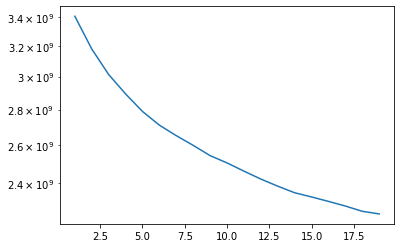

In [ ]:
plt.plot(range(1,20),distancia)
plt.yscale('log')